In [29]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from omegak import process_gbsar_data
import seaborn as sns
import glob
from PIL import Image


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 
** GBSAR parameters **
Step size:  1.0  cm
Number of steps:  60
Total aperture:  0.6  m
Number of chirp samples:  1024
Central frequency:  24.0  GHz
Bandwidth:  1300.0 MHz


/lustre/home/lmucko/diffusion/omegak.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  data[index] = ifft(remove_low_freq)


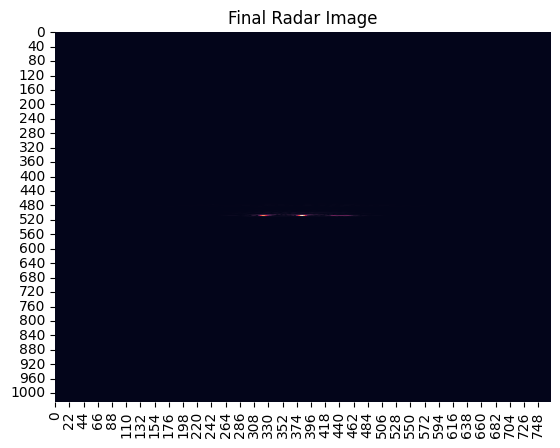

In [27]:
final_radar_image = process_gbsar_data("AR_AS_GS_28.npy", bw=1300e6)

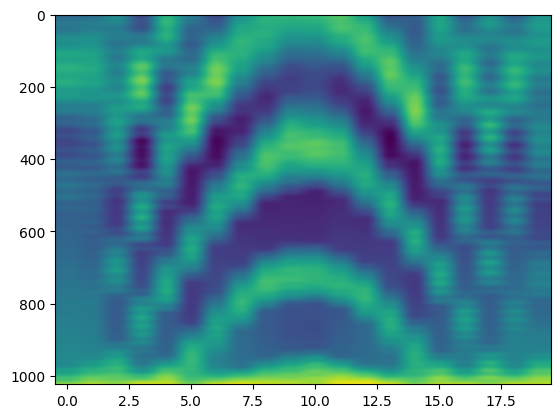

In [24]:
ar = np.load("data/AR_3_hh_28.npy")
plt.imshow(ar, aspect="auto")

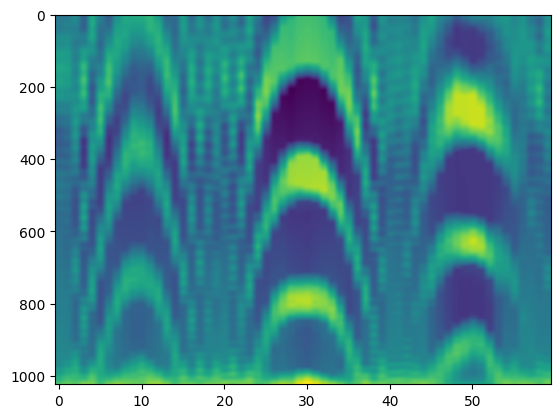

In [22]:
slika = np.load("AR_AS_GS_28.npy")
plt.imshow(slika, aspect="auto")

In [45]:
img = Image.open("/lustre/home/lmucko/diffusion/images/hh/AR_AS_GS_28.png").resize((60, 1024))

In [46]:
arr = np.array(img).astype(np.float32)
np.save("example.npy", arr)

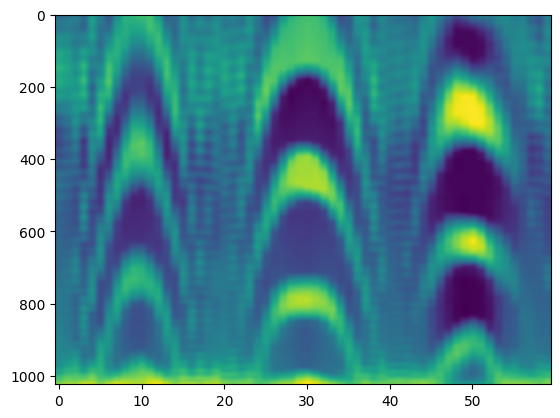

In [48]:
plt.imshow(arr, aspect="auto")

 
** GBSAR parameters **
Step size:  1.0  cm
Number of steps:  60
Total aperture:  0.6  m
Number of chirp samples:  1024
Central frequency:  24.0  GHz
Bandwidth:  1300.0 MHz


/lustre/home/lmucko/diffusion/omegak.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  data[index] = ifft(remove_low_freq)


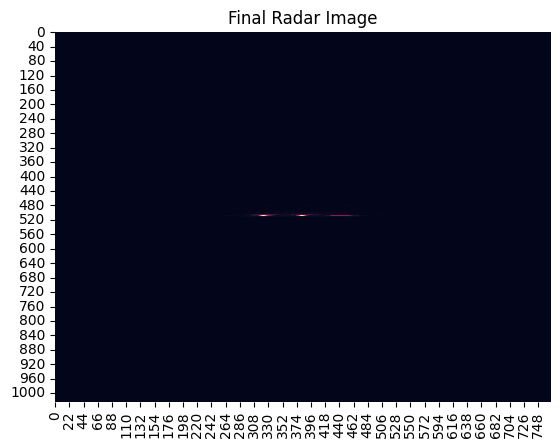

In [49]:
recon_ = process_gbsar_data("example.npy")
recon = recon_[480:520, 280:500]

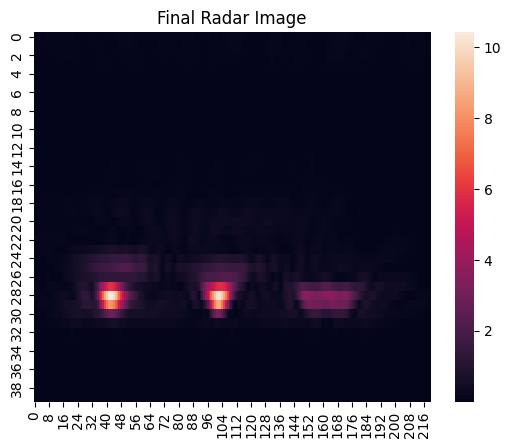

In [50]:
plt.figure()
sns.heatmap(np.abs(recon))
plt.title("Final Radar Image")
plt.savefig("final_radar_image.png")
plt.show()

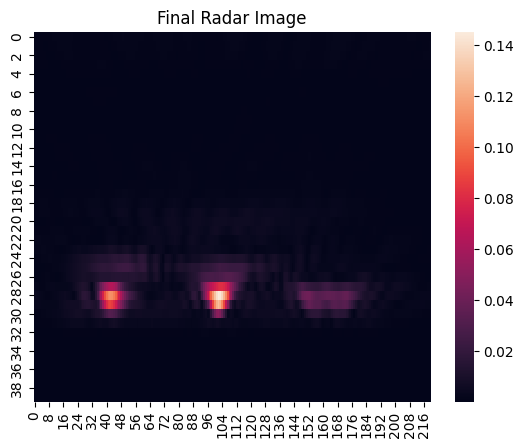

In [28]:
img = final_radar_image[480:520, 280:500]
plt.figure()
sns.heatmap(np.abs(img), cbar=True)
plt.title("Final Radar Image")
plt.savefig("final_radar_image.png")
plt.show()